<h1> Assignment 4, Exercise 7 - 2 <h1>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the last data set has as a third column also a label, which should be used for coloring
the plots). Perform Kernel PCA. Try at least <b>two different kernels</b> with at least <b>five different
kernel parameter settings</b> to compute two principal components. Visualize the
projected data.

First step is to read the data from the csv file:

In [2]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='pca4.csv',
    header=None,
    sep=',')

Next, we need to center the data. For this, for each attribute, the mean of that attribute over all observations is subtracted.

In [3]:
import numpy as np

data = np.array(df.ix[:,:].values)  # transform to numpy array
labels = data[:,-1]  # save the labels separately
data = data[:,:-1]  # discard the labels
data = data - np.mean(data, axis=0)

First, visualize the unprojected data. We make a 2D plot. We notice the data is shaped like 3 concentric circles.

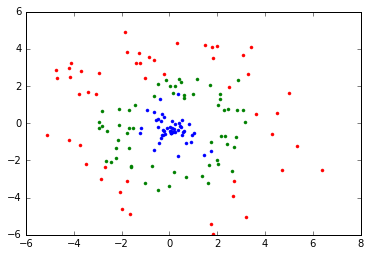

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

labels_set = set(labels)

for label in labels_set:
    # select only the observations having the current label 
    # for being able to plot with different colors
    data_for_label = np.array([data[i] 
                               for i in range(len(labels)) 
                               if labels[i]==label])
    plt.plot(data_for_label[:,0], data_for_label[:,1], '.')

Then, apply KernelPCA with 3 different kernels: poly, rbf and sigmoid.
<h2> 1. The polynomial kernel with various degrees: </h2>

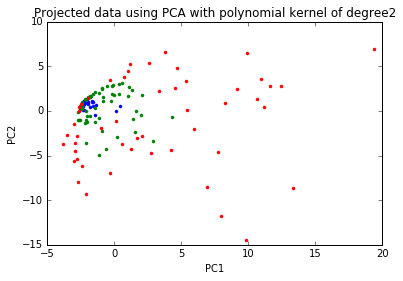

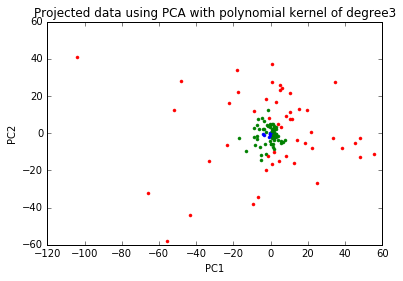

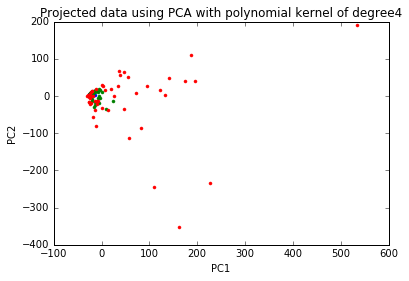

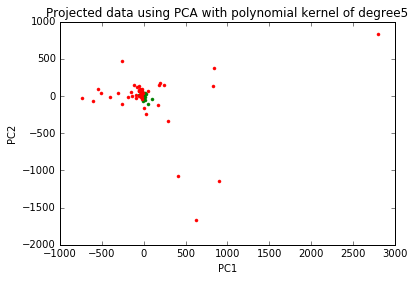

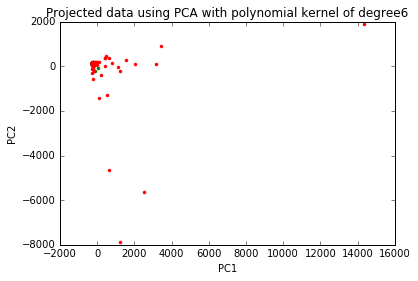

In [5]:
from sklearn.decomposition import KernelPCA


figure_index = 0
# define some degrees for the polynomial kernel
poly_kernel_degrees = [2,3,4,5,6]
for poly_kernel_degree in poly_kernel_degrees:
    
    kpca = KernelPCA(n_components=2, kernel='poly', degree=poly_kernel_degree)
    transformed_data = kpca.fit_transform(data)
    # make a plot using the labels for coloring
    
    for label in labels_set:
        # select only the observations having the current label
        data_for_label = np.array([transformed_data[i] 
                                   for i in range(len(labels)) 
                                   if labels[i]==label])
        plt.figure(figure_index)
        plt.plot(data_for_label[:,0], data_for_label[:,1],'.')
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title("Projected data using PCA with polynomial kernel of degree" 
                  + str(poly_kernel_degree))
        
    figure_index+=1

<h2> 2. The RBF kernel with various values for gamma: </h2>

In [6]:
figure_index = 0
# define some values for gamma for the polynomial kernel
rbf_kernel_gammas = [1,2,5,10,15]

for rbf_kernel_gamma in rbf_kernel_gammas:
    
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=rbf_kernel_gamma)
    transformed_data = kpca.fit_transform(data)
    # make a plot using the labels for coloring
    
    for label in labels_set:
        # select only the observations having the current label
        data_for_label = np.array([transformed_data[i] 
                                   for i in range(len(labels)) 
                                   if labels[i]==label])
        plt.figure(figure_index)
        plt.plot(data_for_label[:,0], data_for_label[:,1],'.')
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title("Projected data using PCA with RBF kernel with gamma " 
                  + str(rbf_kernel_gamma))
        
    figure_index+=1

<h2> 3. The Sigmoid kernel with various degrees: </h2>

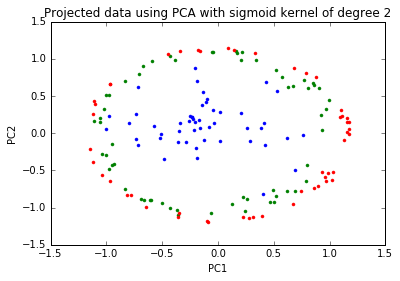

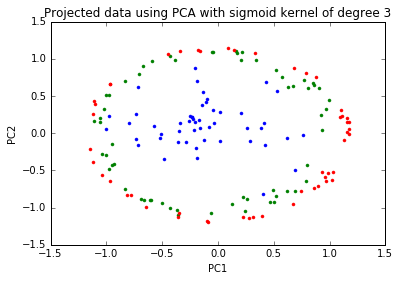

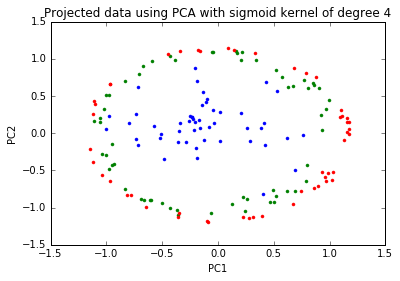

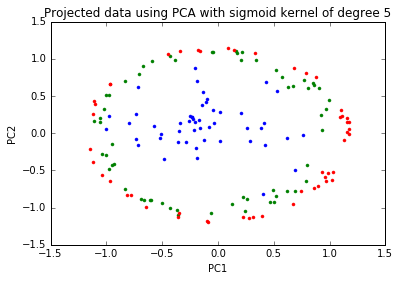

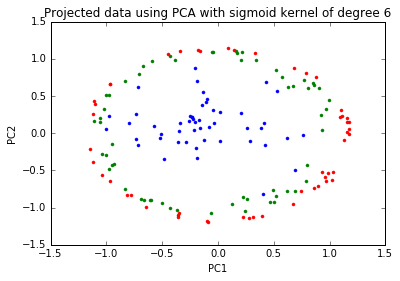

In [7]:
figure_index = 0

for kernel_degree in poly_kernel_degrees:
    
    kpca = KernelPCA(n_components=2, kernel='sigmoid', degree=kernel_degree)
    transformed_data = kpca.fit_transform(data)
    # make a plot using the labels for coloring

    for label in labels_set:
        # select only the observations having the current label
        data_for_label = np.array([transformed_data[i] 
                                   for i in range(len(labels)) 
                                   if labels[i]==label])
        plt.figure(figure_index)
        plt.plot(data_for_label[:,0], data_for_label[:,1],'.')
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title("Projected data using PCA with sigmoid kernel of degree "
                  +str(kernel_degree))
        
    figure_index+=1